<a href="https://colab.research.google.com/github/nirav3/data690_nirav/blob/main/assignments/assignment_6/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #6  
  * Professor: Dr. Jay Wang  
  * Student: Nirav Pancholi  
  * Date: 10/14/2021

## Assignment 06
### Note:
- For visualization, you should use Plotly Express 
- Use use this notebook as your template and follow the instructions

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

The links to the zip file is:

- https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

You can upload the zip file there or run `!wget` command to retrieve it directly, then run `!unzip` command to extract files.

You can also unzip and upload individual files to Colab. 

Your folder structure should look like this in your Colab enviroment:
```
- assignment_07.ipynb
- raw_data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
        - ...
```


In [1]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip

--2021-10-17 01:15:43--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 15.200.243.39, 15.205.92.235, 2600:1f12:18a:7d00:e2fd:78d3:a870:ea91, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|15.200.243.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385541173 (368M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_01192021.zip’

CollegeScorecard_Ra 100%[===================>] 367.68M  22.0MB/s    in 18s     

2021-10-17 01:16:02 (20.1 MB/s) - ‘CollegeScorecard_Raw_Data_01192021.zip’ saved [385541173/385541173]



In [2]:
!unzip CollegeScorecard_Raw_Data_01192021.zip

Archive:  CollegeScorecard_Raw_Data_01192021.zip
   creating: Raw Data Files/
  inflating: Raw Data Files/MERGED2011_12_PP.csv  
  inflating: Raw Data Files/MERGED1999_00_PP.csv  
  inflating: Raw Data Files/MERGED2006_07_PP.csv  
  inflating: Raw Data Files/MERGED2014_15_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: __MACOSX/Raw Data Files/._Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: Raw Data Files/MERGED2003_04_PP.csv  
  inflating: Raw Data Files/MERGED1996_97_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1516_1617_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-Field-of-Study.csv  
  inflating: Raw Data Files/MERGED2012_13_PP.csv  
  inflating: Raw Data Files/MERGED2005_06_PP.csv  
  inflating: Raw Data Files/MERGED2009_10_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1617_1718_PP.csv  
  inflating: Raw Data Files/MERGED2018_19_PP.csv  
  inflating: Raw Data Files/MERGED2017_18_PP.csv  
  inflating

In [81]:
# <1> 
# Import libraries

import os
import pandas as pd
import missingno as msno
import re
import plotly.graph_objects as go

In [4]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder


os.getcwd()

'/content'

In [5]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

dataFiles_list = os.listdir('Raw Data Files')

dataFiles_list

['Crosswalks.zip',
 'MERGED2017_18_PP.csv',
 'MERGED2005_06_PP.csv',
 'data.yaml',
 'MERGED2003_04_PP.csv',
 'MERGED2012_13_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2000_01_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2014_15_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1998_99_PP.csv']

In [50]:
def get_clean_data(data_list):
    clean_file_list = []
    for file in data_list:
        if "MERGED" in file:
            if file.endswith('.csv'):
                clean_file_list.append(str(file))
    return clean_file_list                

In [51]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

clean_data_list = get_clean_data(dataFiles_list)

clean_data_list

['MERGED2017_18_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1998_99_PP.csv']

In [55]:
clean_data_list.sort()

In [57]:
clean_data_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [65]:
def get_year(filename):
    filename = filename.split('_')[0]
    res = re.findall(r'(\d+)', filename)[0]
    return res

In [68]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

list_df = []

for file in clean_data_list:
    year = get_year(file)
    filepath = '/content/Raw Data Files/' + file
    df = pd.read_csv(filepath, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR'] = year
    list_df.append(df)

In [69]:
list_df[0].head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5,NaN,NaN,1996
4,100690,Amridge University,AL,5,NaN,NaN,1996


In [70]:
df_all = pd.concat(list_df)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [74]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df_all.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6897,20627903,Sacramento Center,CA,8.0,NaN,12896.0,2017
2265,168661,AMERICAN COLLEGE OF BEAUTY CULTURE,MI,3.0,NaN,NaN,1997
5938,441186,San Diego State University-Imperial Valley Campus,CA,8.0,0.441,3182.0,2008
764,132666,GUTI The Premier Beauty & Wellness Academy,FL,5.0,NaN,NaN,2010
6389,454856,Denver College of Nursing,CO,7.0,NaN,15889.0,2013


In [75]:
df_all.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [76]:
df_all.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


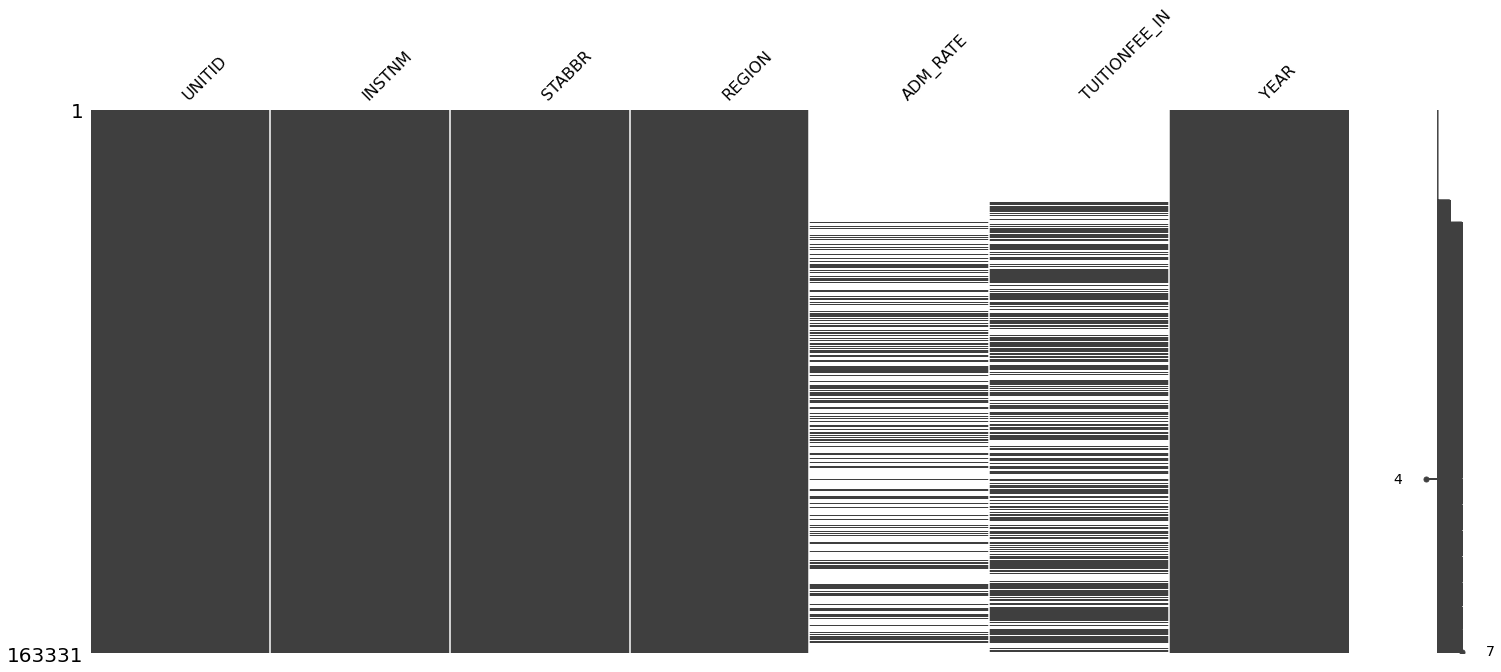

In [77]:
msno.matrix(df_all)

In [78]:
df_all.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [79]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

df_umbc = df_all.query("INSTNM == 'University of Maryland-Baltimore County'")

df_umbc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


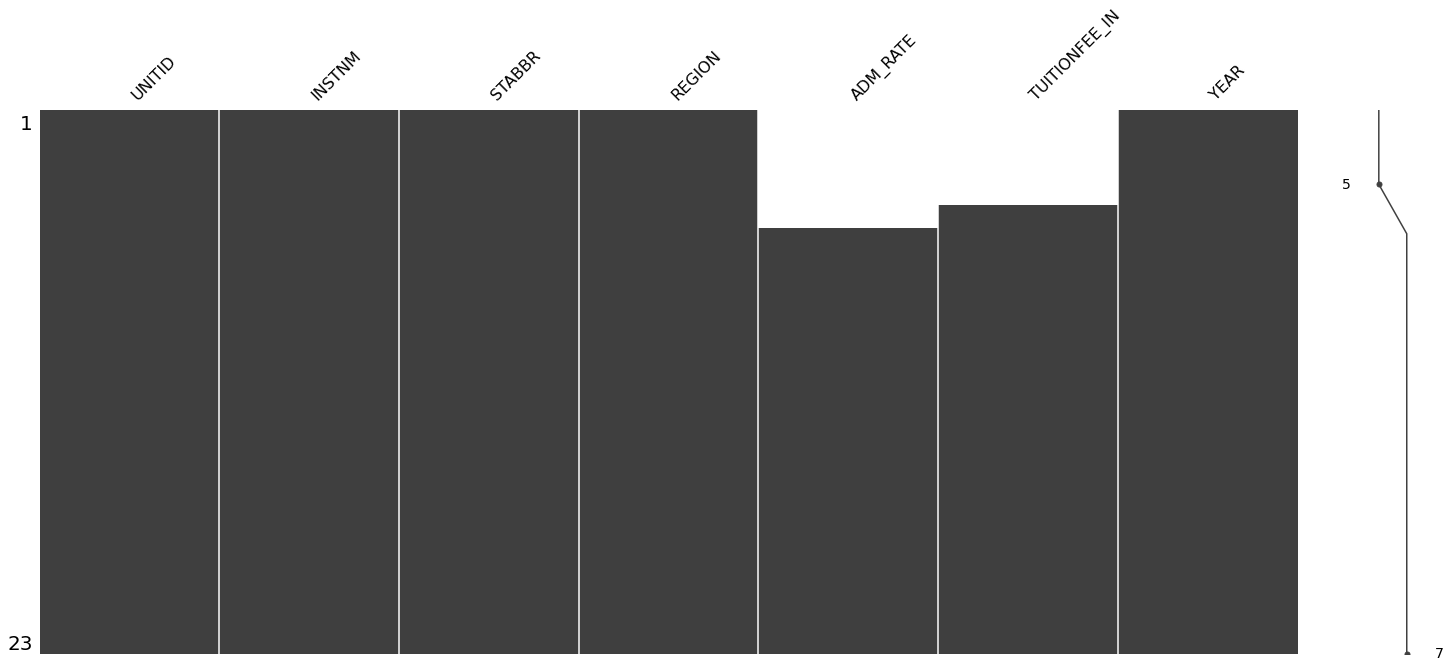

In [80]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

msno.matrix(df_umbc)

In [83]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

fig = go.Figure()

trace_umbc = go.Bar(
    x = df_umbc['YEAR'],
    y = df_umbc['TUITIONFEE_IN'],
    name = 'UMBC'
)

fig.add_traces(trace_umbc)

fig.update_layout(
    title = "UMBC in-state tuition over years",
    xaxis = {"title" : "Year"},
    yaxis = {"title" : "In-state tuition in USD"}
)

fig.show()

In [85]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart


fig = go.Figure()

trace_umbc = go.Scatter(
    x = df_umbc['YEAR'],
    y = df_umbc['TUITIONFEE_IN'],
    name = 'UMBC'
)

fig.add_traces(trace_umbc)

fig.update_layout(
    title = "UMBC in-state tuition over years",
    xaxis = {"title" : "Year"},
    yaxis = {"title" : "In-state tuition in USD"}
)

fig.show()

In [86]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

umbc_list = list(df_umbc['TUITIONFEE_IN'])
umbc_list

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [15]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

def calculate_change_percent(val1, val2):
    
    if(val1 == 'nan'):
    

In [16]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)

In [17]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)

In [18]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)



In [19]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)

 

In [20]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)


In [21]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)



In [22]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)



In [23]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)



In [24]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)



In [25]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)



In [26]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)



In [27]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)



In [28]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)



In [29]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)



In [30]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)



In [31]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [32]:
# The end.